In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
'''
Attributes
----------
- ts (list)      : saves the time steps
- g (float)      : value for gravitational constant in m/s
- L (float)      : value for the length of the rope in m
- b (float)      : value for dampening term (needs to be negative)
- step (float)   : value for the step size (in seconds)
- thetas (list)  : list of angular positions (angles are in radians)
- angVels (list) : list of angular velocities (in radians per second)
- pos (list)     : positions x and y

Methods
-------
- update        : uses RK4 to update the variables
- displayGraphs : display graphs of time vs position, time vs velocity, and position vs velocity

*The animation function was provided in another cell
'''

class SimplePendulum:

    def __init__(self, theta, angVel, stepSize, length = 3, dampening = 0, A = 0, omega = 0):
        self.ts      = [0]
        self.g       = 9.8
        self.L       = length
        self.A       = A
        self.omega   = omega
        self.b       = dampening
        self.step    = stepSize
        self.thetas  = [theta*np.pi/180]
        self.angVels = [angVel]
        self.pos     = [-self.L*np.sin(self.thetas[-1]), -self.L*np.cos(self.thetas[-1])]
    
     
        

    '''
    Defines Runge Kutta 4 numerical method for solving the system.
    '''
    def rungeKutta4(self, f, yi):
        k1 = f(self.ts[-1], yi)
        k2 = f(self.ts[-1] + self.step/2, yi + (1/2)*self.step*k1)
        k3 = f(self.ts[-1] + self.step/2, yi + (1/2)*self.step*k2)
        k4 = f(self.ts[-1] + self.step, yi + self.step*k3)
        yNext = yi + self.step*(k1 + 2*k2 + 2*k3 + k4)/6
        return yNext
    
    
    
    '''
    Return the derivatives of the state variables so that we can use 
    rungeKutta4 function
    '''
    def pendulumDerivs(self, t, state):
        theta, angVel = state[0], state[1]
        thetaPrime  = angVel
        angVelPrime = - self.g*np.sin(theta)/self.L - self.b*angVel + self.A*np.cos(self.omega*self.ts[-1])
        return np.array((thetaPrime, angVelPrime))
        
        
    
        
    '''
    Run the update function n times if desired. This function also updates the 
    self.pos attribute with the x and y coordinates of the pendulum's bob
    '''
    def update(self, n = 1):
        for _ in range(n):
            self.ts.append(self.ts[-1] + self.step)
            thetaNext, angVelNext = self.rungeKutta4(self.pendulumDerivs, (self.thetas[-1], self.angVels[-1]))
            if thetaNext > np.pi: thetaNext -= 2*np.pi       # comment this if desired 
            elif thetaNext < -np.pi: thetaNext += 2*np.pi    # comment this if you comment the line above
            self.thetas.append(thetaNext)
            self.angVels.append(angVelNext)
            self.pos = [-self.L*np.sin(self.thetas[-1]), -self.L*np.cos(self.thetas[-1])]
            
            
            

    '''
    Make a position vs time plot and a velocity vs time plot 
    '''
    def displayGraphs(self):
        %matplotlib inline
        fig, axs = plt.subplots(1, 3, figsize = (16, 4))
        fig.suptitle(f"Plots with b = {self.b}, A = {self.A}, ω = {self.omega}", fontsize = 16)
        fig.subplots_adjust(top = 0.85)
        
        axs[0].scatter(self.ts, self.thetas, c=self.ts, cmap = 'Blues', marker='.')
        axs[0].set_title("Time vs Angle")
        axs[0].set_xlabel("Time (secs)")
        axs[0].set_ylabel("Angle (radians)")
        
        axs[1].scatter(self.ts, self.angVels, c=self.ts, cmap='Blues', marker='.')
        axs[1].set_title("Time vs Velocity")
        axs[1].set_xlabel("Time (secs)")
        axs[1].set_ylabel("Angular Velocity (rad/sec)")
        
        axs[2].scatter(self.thetas, self.angVels, c=self.ts, cmap='Blues', marker='.', lw = 0.3)
        axs[2].set_title("Phase Space")
        axs[2].set_xlabel("Angle")
        axs[2].set_ylabel("Angular Velocity")
        
        plt.show()

In [3]:
theta = 90
angVel = 0
k = 0.01
L = 10
b = 0.2
A = 0
omega = 0

sys = SimplePendulum(theta, angVel, k, L, b, A, omega)

In [4]:
#############
# ANIMATION #
#############

%matplotlib notebook

# create figure, axis, and lines for drawing
lines  = [None, None]
fig    = plt.figure(figsize =(3,3))
ax     = plt.subplot(xlim = (-sys.L*1.5, sys.L*1.5), ylim = (-sys.L*1.5, sys.L*1.5))

# initialize lines to certain values
lines[0], = ax.plot([sys.pos[0]], [sys.pos[1]], ms = 20, color = 'red', marker = 'o')  
lines[1], = ax.plot([0, sys.pos[0]], [0, sys.pos[1]], color = 'blue')

ax.set_xticks([])
ax.set_yticks([])
ax.hlines(0, -2, 2, ls = 'dotted')


def animate(i):
    sys.update(n=5)
    lines[0].set_data(sys.pos[0], sys.pos[1])
    lines[1].set_data([0, sys.pos[0]], [0, sys.pos[1]])
    return lines
    
    
# starts animation
ani = animation.FuncAnimation(fig, animate, np.arange(1, 500), interval = 1, blit = True)
plt.show()

<IPython.core.display.Javascript object>

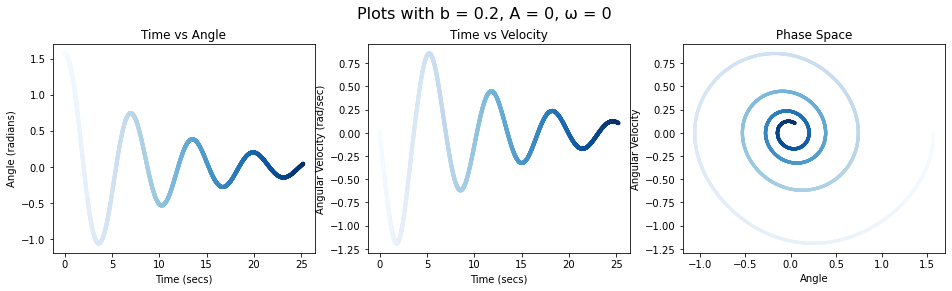

In [5]:
sys.displayGraphs()

Let's look at how the parameter $\omega$ influences our system. Using the initial conditions and parameter values given below, plot the phase space for each $\omega$ in the list $\omega = [0.724, 0.715, 0.711, 0.667]$. 

- step size: 0.1
- initial angle: 30 degrees
- initial velocity: 0
- damping: 0.5
- drive strength: 1.2

How does the phase space change as you vary $\omega$? For what $\omega$ do you start to see a chaotic behavior on your system? How do you identify that a behavior is chaotic in this scenario? (Hint: you could plot a Poincare plot and analyze it)

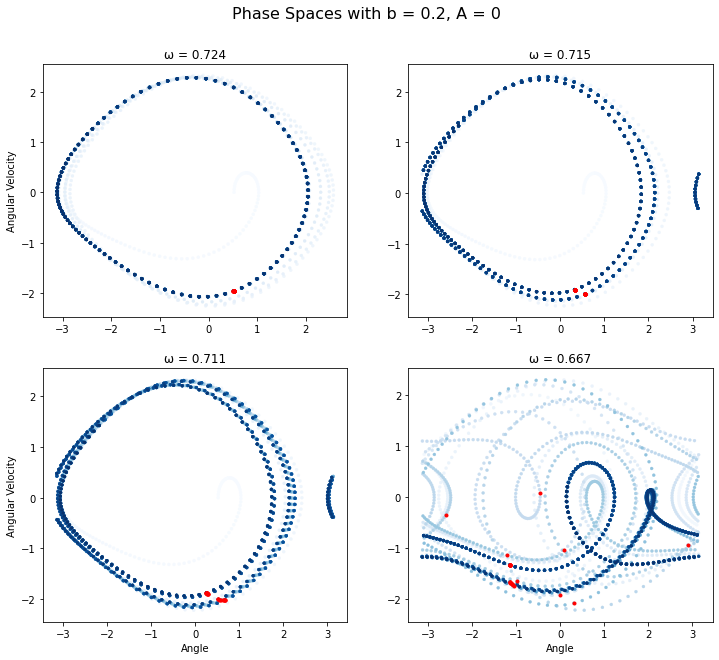

In [6]:
skip  = 500        # skip first 500 steps when plotting
steps = 100        # steps per lap


theta = 30         # initial angle (degrees)
angVel = 0         # initial angular velocity
L = 10             # rod length
b = 0.5            # damping
A = 1.2            # drive strength


# matrix of omega values for plotting on 2x2 grid
omegas = [[0.724, 0.715], [0.711, 0.667]]
thetasP, angVelsP = [], []



# initializing subplots
fig, axs = plt.subplots(2, 2, figsize = (12, 10))
fig.suptitle(f"Phase Spaces with b = {sys.b}, A = {sys.A}", fontsize = 16)
fig.subplots_adjust(top = 0.9)



# running simulation for 3000 steps for each omega and plot graphs
for i in range(len(omegas)):
    for j in range(len(omegas)):
        
        # initializing and updating the system
        k = (2*np.pi) / (omegas[i][j]*steps)
        sys = SimplePendulum(theta, angVel, k, L, b, A, omegas[i][j])    
        sys.update(n=3000)
        
        # computing points for poincare plot
        thetasP  = [sys.thetas[i] for i in range(skip + 50, len(sys.thetas), steps)]
        angVelsP = [sys.angVels[i] for i in range(skip + 50, len(sys.angVels), steps)]
        
        # ploting phase space and poincare plot
        axs[i, j].scatter(sys.thetas, sys.angVels, c=sys.ts, cmap='Blues', marker='.', lw = 0.3)
        axs[i, j].scatter(thetasP, angVelsP, c = 'red', marker = '.')
        axs[i, j].set_title(f"ω = {sys.omega}")

        
        
# naming axis
axs[1, 0].set_xlabel("Angle")
axs[1, 1].set_xlabel("Angle")
axs[0, 0].set_ylabel("Angular Velocity")
axs[1, 0].set_ylabel("Angular Velocity")
plt.show()

The plot on the top left corner shows that after an initialization phase, the system seems to reach an equilibrium phase space "orbit" (a system attractor) as the pendulum's variables take on the same cyclical values. We can see that there is no variation on this stable orbit through the Poincare plot (the red dot on the figure does not move), which is plotted at every complete cycle starting after the initialization phase.  The plot on the upper right corner displays a division on the stable orbit from the phase space. There are two stable sequential cycles, as we can see from the two red points from the Poincare plot. The graph on the bottom left corner displays four stable cycles. It is actually hard to identify if there indeed are four cycles or if there are three instead based on the Poincare plot. Finally, the plot on the bottom right corner that uses an $\omega = 0.667$ shows a chaotic behavior, which can be identified by the Poincare plot, which does not present only a few points. Thus, the plot does not reach a very stable cycle, and it should be the case that varying the initial conditions by a tiny bit should change the face of the plot. Should we try to test this out?

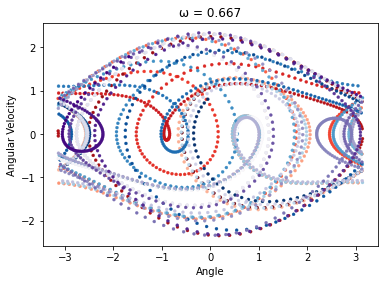

In [7]:
skip  = 500        # skip first 500 steps when plotting
steps = 100        # steps per lap


omega  = 0.667     # frequency
angVel = 0         # initial angular velocity
L = 10             # rod length
b = 0.5            # damping
A = 1.2            # drive strength
k = (2*np.pi) / (omega*steps)
thetas = [29, 30, 31]
cmaps = ['Reds', 'Blues', 'Purples']



# initializing subplots
fig, axs = plt.subplots(1, 1, figsize = (6, 4))
fig.subplots_adjust(top = 0.9)



# running simulation for 3000 steps for each omega and plot graphs
for i in range(len(thetas)):
        
    # initializing and updating the system
    sys = SimplePendulum(thetas[i], angVel, k, L, b, A, omega)    
    sys.update(n=1000)

    # ploting phase space and poincare plot
    axs.scatter(sys.thetas, sys.angVels, c=sys.ts, cmap=cmaps[i], marker='.', lw = 0.3)
    axs.set_title(f"ω = {sys.omega}")

        
        
# naming axis
axs.set_xlabel("Angle")
axs.set_ylabel("Angular Velocity")
plt.show()

In [8]:
# LET THIS RUN FOR SOME TIME TO SEE WHEN THE PENDULUMS GET INDEPENDENT PATHS


skip  = 500        # skip first 500 steps when plotting
steps = 100        # steps per lap

omega  = 0.667     # frequency
angVel = 0         # initial angular velocity
L = 10             # rod length
b = 0.5            # damping
A = 1.2            # drive strength
k = (2*np.pi) / (omega*steps)
thetas = [29, 30, 31]

# initializing systems
sys1 = SimplePendulum(thetas[0], angVel, k, L, b, A, omega)    
sys2 = SimplePendulum(thetas[1], angVel, k, L, b, A, omega)    
sys3 = SimplePendulum(thetas[2], angVel, k, L, b, A, omega)    


#############
# ANIMATION #
#############

%matplotlib notebook

# create figure, axis, and lines for drawing
lines  = [None]*6
fig    = plt.figure(figsize =(3,3))
ax     = plt.subplot(xlim = (-sys.L*1.5, sys.L*1.5), ylim = (-sys.L*1.5, sys.L*1.5))

# initialize lines to certain values
lines[0], = ax.plot([sys1.pos[0]], [sys1.pos[1]], ms = 20, color = 'red', marker = '.', lw = 0.3)  
lines[1], = ax.plot([0, sys1.pos[0]], [0, sys1.pos[1]], color = 'red', alpha = 0.5)
lines[2], = ax.plot([sys2.pos[0]], [sys2.pos[1]], ms = 20, color = 'blue', marker = '.', lw = 0.3)  
lines[3], = ax.plot([0, sys2.pos[0]], [0, sys2.pos[1]], color = 'blue', alpha = 0.5)
lines[4], = ax.plot([sys3.pos[0]], [sys3.pos[1]], ms = 20, color = 'purple', marker = '.', lw = 0.3)  
lines[5], = ax.plot([0, sys3.pos[0]], [0, sys3.pos[1]], color = 'purple', alpha = 0.5)

ax.set_xticks([])
ax.set_yticks([])
ax.hlines(0, -2, 2, ls = 'dotted')


def animate(i):
    sys1.update(n=1)
    sys2.update(n=1)
    sys3.update(n=1)
    lines[0].set_data(sys1.pos[0], sys1.pos[1])
    lines[1].set_data([0, sys1.pos[0]], [0, sys1.pos[1]])
    lines[2].set_data(sys2.pos[0], sys2.pos[1])
    lines[3].set_data([0, sys2.pos[0]], [0, sys2.pos[1]])
    lines[4].set_data(sys3.pos[0], sys3.pos[1])
    lines[5].set_data([0, sys3.pos[0]], [0, sys3.pos[1]])
    return lines
    
    
# starts animation
ani = animation.FuncAnimation(fig, animate, np.arange(1, 500), interval = 30, blit = True)
plt.show()

<IPython.core.display.Javascript object>

As we can see from the phase space plot and the pendulum animation, the paths the pendulums take start similar but then end up very different after some time. The only thing we changed on the different scenarios was the value of $\theta$, which was 29, 30, and 31 degrees. Since we see that the system behaves very differently for similar initial conditions, then the system with the defined simulation parameters (including $\omega = 0.667$) is chaotic. Notice that by chaotic we don't mean that the system behaves randomly or even that a stable orbit like the ones we saw in the other scenraios (different $\omega$) cannot be achieved. It just means that we cannot predict the path that a pendulum will take by based on the path that a very similar instance of the problem took.